In [12]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, datasets

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [13]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 斜向三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 稀疏三群 資料點
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

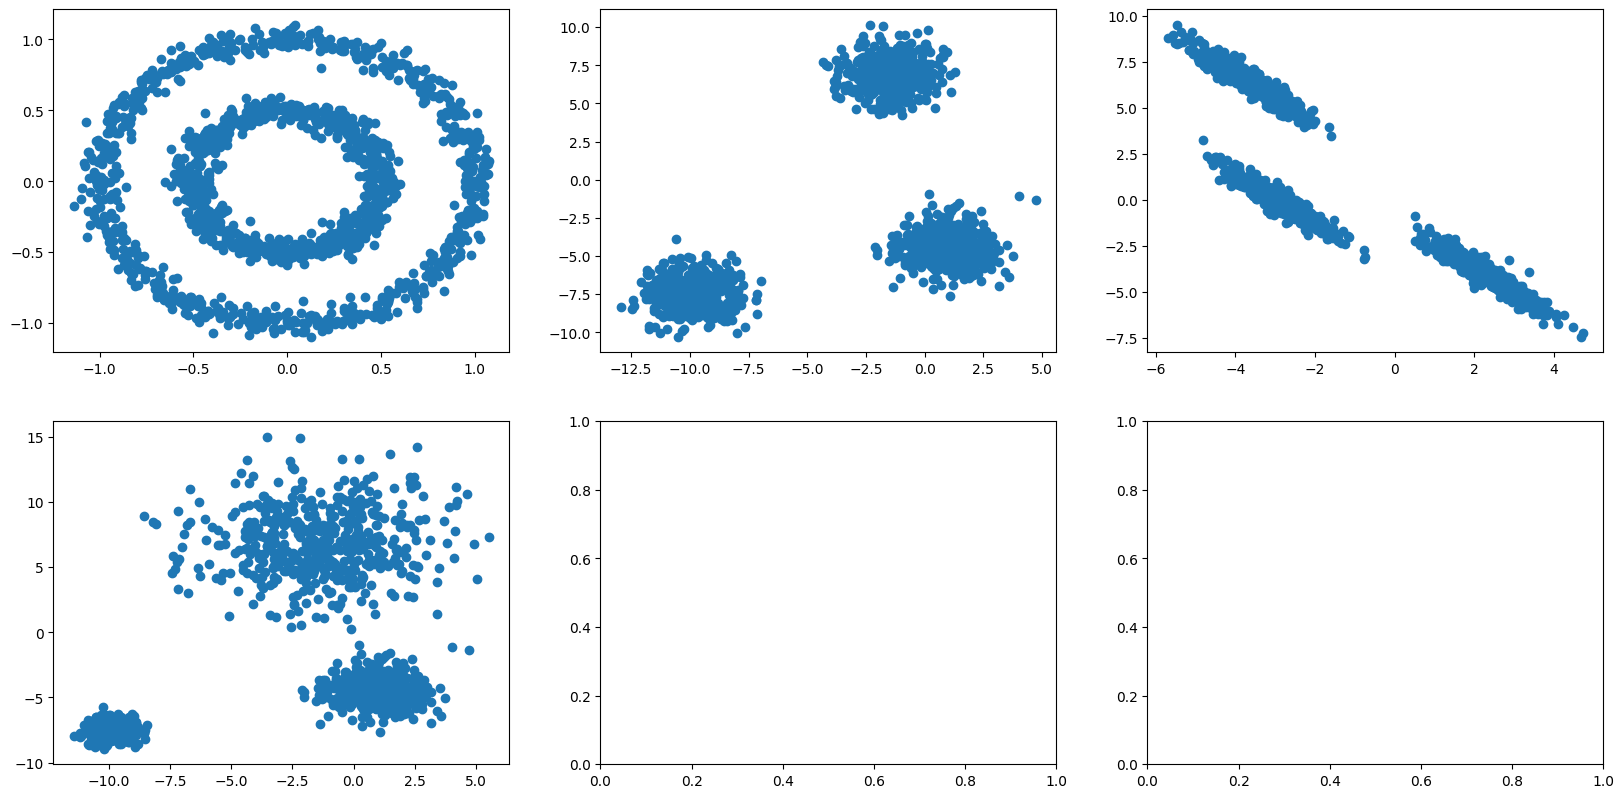

In [10]:
fig, axes = plt.subplots(figsize=(20, 10),nrows=2, ncols=3, sharex=False, sharey=False, dpi=100)
axes[0,0].scatter(noisy_circles[0][:,0],noisy_circles[0][:,1])
axes[0,1].scatter(X[:,0],X[:,1])
axes[0,2].scatter(X_aniso[:,0],X_aniso[:,1])
axes[1,0].scatter(varied[0][:,0],varied[0][:,1])
plt.show()

https://docs.python.org/3.8/library/itertools.html#itertools.cycle <br>
https://docs.python.org/3.8/library/itertools.html#itertools.islice

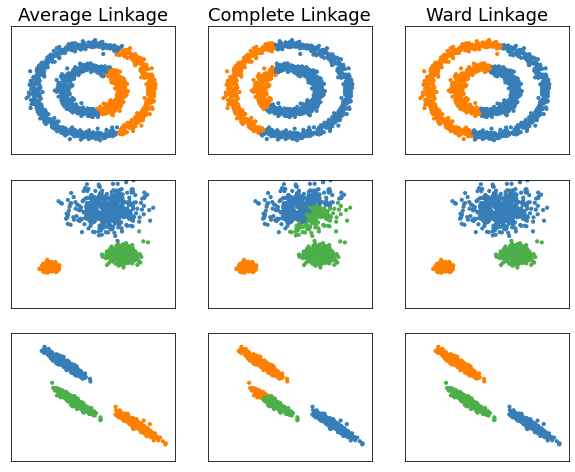

In [11]:
from itertools import cycle, islice

# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1

datasets = [(noisy_circles, {'n_clusters': 2}), 
            (varied, {'n_clusters': 3}), 
            (aniso, {'n_clusters': 3})]

# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=algo_params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=algo_params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=algo_params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        y_pred = algorithm.fit_predict(X)
        
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.show()

# 觀察結果
- 三群 : Average 與 Ward 效果都還不錯
- 斜三群 : 三者效果也是以 Complete 較差
- 同學可以試著替換不同的 random_state 觀察, 會有不同的結果